In [1]:
import matplotlib.pyplot as plt #importing dependencies 
import numpy as np
import os 
import csv 
import pandas as pd
import scipy.stats as st

In [2]:
path1 = "Mouse_metadata.csv" #uploading the mouse metadata 
mousemeta = pd.read_csv("Mouse_metadata.csv")

In [3]:
path2 = "Study_results.csv" #uploading study results 
studyres = pd.read_csv("Study_results.csv")

In [4]:
combined = pd.merge(mousemeta,studyres, on = "Mouse ID") #merging both uploads together

In [5]:
numberofmice = len(combined["Mouse ID"].unique()) #using len funciont to find number of mice


In [6]:
numberofmice #number of mice with duplicates 

249

In [7]:
duplicated = combined[combined.duplicated()] #finding the duplicate 

In [8]:
combined[combined.duplicated()] #fiding information about duplicate most 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [9]:
dup = combined[combined.duplicated()] #storing that informaiton in a variable 

In [10]:
CleanCombined = combined[combined['Mouse ID']  != 'g989'] #elminate g989 - mouse ID 

In [11]:
len(CleanCombined["Mouse ID"].unique()) #finding the the new number of mice 

248

In [12]:
UpdatedLen = len(CleanCombined["Mouse ID"].unique())  #storing it in variable 

In [13]:
UpdatedLen #showing new number 

248

In [14]:
name = CleanCombined["Drug Regimen"].unique()  #finding the unique regimnets so I can get data for each one 

In [15]:
name

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [16]:
SummaryStatistics = pd.DataFrame(name) #creating a dataFrame with the names I found through the unique funcitons

In [17]:
group = CleanCombined.groupby("Drug Regimen") #grouping by drug so I can provide analysis on each one 

In [18]:
means = list(group["Tumor Volume (mm3)"].mean()) #finding the mean for each drug 

In [19]:
SummaryStatistics["Means"] = means #adding to summary table 

In [20]:
medians =list(group["Tumor Volume (mm3)"].median()) #finding medians 

In [21]:
var = list(group["Tumor Volume (mm3)"].var()) #finding var 

In [22]:
std = list(group["Tumor Volume (mm3)"].std()) #finding standard deviation 

In [23]:
SEM = list(group["Tumor Volume (mm3)"].sem()) #finding standard error 

In [24]:
SummaryStatistics["SEM"] = SEM #adding to summary table 

In [25]:
SummaryStatistics["Variance"] = var #adding to summary table 

In [26]:
SummaryStatistics["Medians"] = medians #adding to summary table 

In [27]:
SummaryStatistics["Standard Deviation"] = std #adding to summary table 

In [28]:
summarystatistics2 = CleanCombined.groupby("Drug Regimen").agg(mean = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc ='mean'), median = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc ='median'),var = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc ='var'),std = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc ='std'),SEM = pd.NamedAgg(column = "Tumor Volume (mm3)", aggfunc ='sem'))#using ag funciton as an alternative way to create summary table 

In [29]:
summarystatistics2

,mean,median,var,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
SummaryStatistics = SummaryStatistics.rename(columns = {0:"Drug Regimen"}) #renaming first summary statistics table to drug regiment vs 0

In [31]:
SummaryStatistics #renamed table 

,Drug Regimen,Means,SEM,Variance,Medians,Standard Deviation
0,Ramicane,40.675741,0.329346,24.947764,41.557809,4.994774
1,Capomulin,52.591172,0.469821,39.290177,51.776157,6.268188
2,Infubinol,52.884795,0.492236,43.128684,51.820584,6.567243
3,Placebo,55.235638,0.603860,68.553577,53.698743,8.279709
4,Ceftamin,54.331565,0.596466,66.173479,52.509285,8.134708
5,Stelasyn,54.033581,0.581331,61.168083,52.288934,7.821003
6,Zoniferol,52.320930,0.544332,43.852013,50.446266,6.622085
7,Ketapril,40.216745,0.320955,23.486704,40.673236,4.846308
8,Propriva,54.233149,0.573111,59.450562,52.431737,7.710419
9,Naftisol,53.236507,0.516398,48.533355,51.818479,6.966589


In [32]:
group = CleanCombined.groupby("Drug Regimen") #groupoing to get total for each drug 

In [33]:
Count = group.count() #using count to get total 

In [34]:
Sort = Count.sort_values(by = ['Mouse ID'],ascending = False) #sorting from most to least so bar graph looks better 

In [35]:
Sort #final sort 

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ramicane,228,228,228,228,228,228,228
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Zoniferol,182,182,182,182,182,182,182
Placebo,181,181,181,181,181,181,181
Stelasyn,181,181,181,181,181,181,181
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178


In [36]:
listofcount = list(Sort["Mouse ID"]) #create list of occurences 

In [37]:
listofcount #list

[230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

In [38]:
listofname = []#create a list of drug names to create graphs 
for row in Sort.index:
    listofname.append(row)

In [39]:
listofname #name list 

['Capomulin',
 'Ramicane',
 'Ketapril',
 'Naftisol',
 'Zoniferol',
 'Placebo',
 'Stelasyn',
 'Ceftamin',
 'Infubinol',
 'Propriva']

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

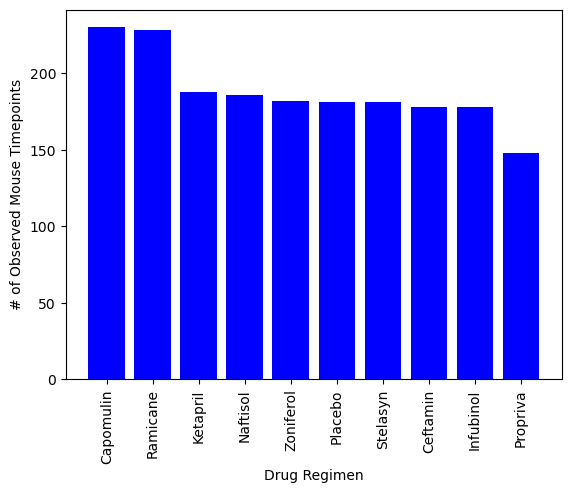

In [40]:
TimepointBar2 = plt.bar(listofname,listofcount, color = "blue") #matplotlib method using information above 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation = 'vertical')


In [41]:
BarDF = pd.DataFrame(listofcount,listofname) #create a dataframe to use pandas 

In [42]:
BarDF

,0
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178
Propriva,148


[Text(0.5, 0, 'Drug Regiment'), Text(0, 0.5, '# of Observed Mouse Timepoints')]

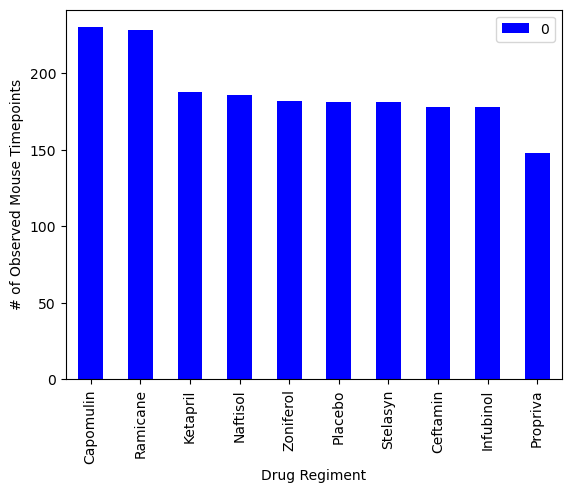

In [43]:
TimeBar = BarDF.plot(kind = "bar", color = "blue", ) #pandas method using DataFrame above 
TimeBar.set(xlabel = "Drug Regiment", ylabel = "# of Observed Mouse Timepoints")


In [44]:
lasttimepoint = CleanCombined.groupby("Mouse ID").last() #finding the information about last timepoint for each mouse 

In [45]:
lasttimepoint

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [46]:
listofsexs = list(lasttimepoint["Sex"]) #what is the sex for each mouse for pie graph 

In [47]:
listofsexs

['Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male',
 '

In [48]:
len(listofsexs) #make sure I have all 248

248

In [49]:
female = []#get male to female ratio - method 1 - method 2 is .value_counts()
male = []

for x in listofsexs:
    if x == "Male":
        male.append(x)
    else:
        female.append(x)

In [50]:
malecount = int(len(male)) #how many males out of 248

In [51]:
malecount

125

In [52]:
malecount/248 # male percent 

0.5040322580645161

In [53]:
femalecount = int(len(female)) #how many females out of 248

In [54]:
femalecount

123

In [55]:
malecount

125

In [56]:
pievalues =[] #make list of pie values for matplotlib 
pievalues.append(malecount)
pievalues.append(femalecount)

In [57]:
pievalues

[125, 123]

([<matplotlib.patches.Wedge at 0x16bded010>,
 [Text(-0.013934097579311132, 1.0999117423341975, 'Male'),
  Text(0.013934097579310996, -1.0999117423341975, 'Female')],
 [Text(-0.007600416861442434, 0.5999518594550168, '50.4%'),
  Text(0.007600416861442361, -0.5999518594550168, '49.6%')])

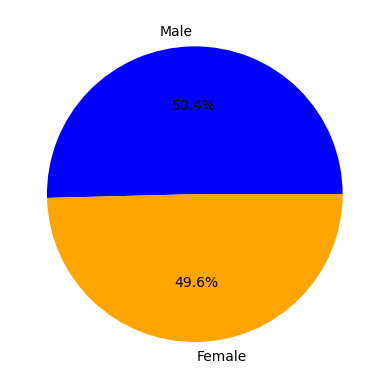

In [58]:
plt.pie(pievalues, labels = ["Male", "Female"], colors = ["blue", "orange"], autopct = "%1.1f%%")#matplotlib

In [59]:
MalevsFemale = pd.DataFrame(pievalues) #make dataFrame for Pandas 

In [60]:
MalevsFemale = MalevsFemale.rename(columns = {0: "Sex"}) #rename columen 

In [61]:
MalevsFemale

,Sex
0,125
1,123


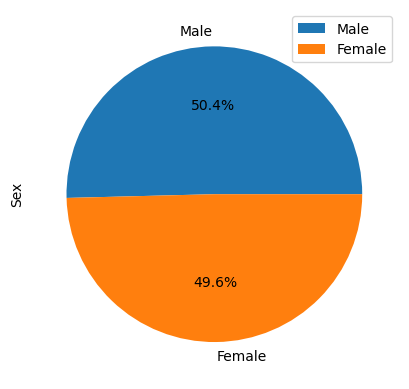

In [62]:
PieChart = MalevsFemale.plot(kind = "pie", labels = ["Male", "Female"], autopct = "%1.1f%%", subplots = True)#pandas 

In [63]:
LastValue = CleanCombined.groupby("Mouse ID").last() #find last value for more analysis on final timepint volume 

In [64]:
LastValue

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,30.638696,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [65]:
mask = ((LastValue["Drug Regimen"] == "Capomulin") | (LastValue["Drug Regimen"] == "Ramicane") | (LastValue["Drug Regimen"] == "Infubinol") | (LastValue["Drug Regimen"] == "Infubinol") | (LastValue["Drug Regimen"] == "Ceftamin"))

In [66]:
LastValue = LastValue.loc[mask] #sport by drugs 

In [67]:
LastValue

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,38.407618,1
a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...
y769,Ceftamin,Female,6,27,45,68.594745,4
y793,Capomulin,Male,17,17,45,31.896238,2
y865,Ceftamin,Male,23,26,45,64.729837,3


In [68]:
Names = LastValue.columns

In [69]:
TumorVolume = Names[5] #save tumor value column name for later graph

In [70]:
TumorVolume

'Tumor Volume (mm3)'

In [71]:
Capomulin = []#list of tumor volumes per drug and graph a box plot with outliers and IQR 
Infubinol = []
Ramicane = []
Ceftamin = []

for index,row in LastValue.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        Capomulin.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Infubinol":
        Infubinol.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ramicane":
        Ramicane.append(row["Tumor Volume (mm3)"])
    elif row["Drug Regimen"] == "Ceftamin":
        Ceftamin.append(row["Tumor Volume (mm3)"])

In [72]:
data = pd.DataFrame({"Capomulin" : Capomulin, "Ramicane": Ramicane, "Infubinol": Infubinol, "Ceftamin": Ceftamin })#create data from 

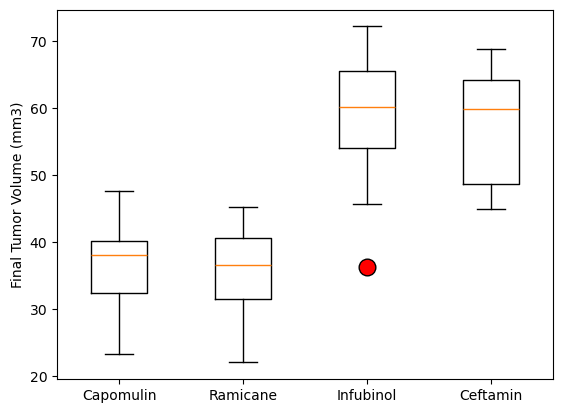

In [73]:
#plot = data[["Capomulin","Ramicane","Infubinol","Ceftamin"]].plot(kind = 'box')
listofregimen = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
#plot.set_ylabel("Final Tumor Volume (mm3)")
circlesymbol = dict(markerfacecolor='red',markersize=12) #circlesymbol
plt.boxplot(data, labels = listofregimen,flierprops=circlesymbol)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()#crate box plot using tumor volume lists above 

In [74]:
Cap = data["Capomulin"]#divide data to find IQR's etc 
Ram = data["Ramicane"]
Inf = data["Infubinol"]
Ceft = data["Ceftamin"]

In [75]:
capquart = Cap.quantile([.25,.5,.75])#finding quartiles 
Ramquart = Ram.quantile([.25,.5,.75])
infquart = Inf.quantile([.25,.5,.75])
Ceftquart = Ceft.quantile([.25,.5,.75])

In [76]:
capiqr = capquart[.75]-capquart[.25] #cap IQR

In [77]:
Ramiqr = Ramquart[.75]-Ramquart[.25] #RAM IQR

In [78]:
InfIqr = infquart[.75]-infquart[.25] #INF IQR

In [79]:
CefIqr = Ceftquart[.75]-Ceftquart[.25] #CEF IQR 

In [80]:
CapUpper = capquart[.75] #find upper and lower quartiles and medians
Caplower = capquart[.25]
CapMed = capquart[.5]

In [81]:
RamUpper = Ramquart[.75]
RamLower = Ramquart[.25]
RamMed = Ramquart[.5]

In [82]:
InfUpper = infquart[.75]
InfLower = infquart[.25]
InfMed = infquart[.5]

In [83]:
CefUpper= Ceftquart[.75]
CefLower= Ceftquart[.25]
CefMed = Ceftquart[.5]

In [84]:
Cefupperbound = CefUpper + (1.5* CefIqr) #find upper and lower bounds using 1.5 IQR
CefLowerBound = CefLower - (1.5 * CefIqr)

In [85]:
InfUpperbound = InfUpper + (1.5* InfIqr)
InfLowerBound = InfLower - (1.5* InfIqr)

In [86]:
RamUpperBound = RamUpper + (1.5 * Ramiqr)
RamLowerBound = RamLower + (1.5 * Ramiqr)

In [87]:
CapUpperBound = CapUpper + (1.5 * capiqr )
CapLowerBound = Caplower + (1.5 * capiqr)

In [88]:
Capoutlier = []# create outlier list based on bounds 
Ramoutlier = []
Cefoutlier = []
Infoutlier = []


In [89]:
for x in Capomulin:#for loops to find outliers 
    if x < CapLowerBound or x > CapUpperBound:
        Capoutlier.append(x)
        

In [90]:
for x in Ramicane:
    if x < RamLowerBound or x > RamUpperBound:
        Ramoutlier.append(x)
        

In [91]:
for x in Ceftamin:
    if x < CefLowerBound or x > Cefupperbound:
        Cefoutlier.append(x)

In [92]:
for x in Infubinol:
    if x < InfLowerBound or x > InfUpperbound:
        Infoutlier.append(x)
        

In [93]:
CapStatement = f"Capomulins potential outliers: {Capoutlier}, Name: {TumorVolume}, dtype: {Cap.dtype} " #statemetns regarding outlier 

In [94]:
RamStatement = f"Ramicane's potential outliers: {Ramoutlier}, Name: {TumorVolume}, dtype: {Ram.dtype}"

In [95]:
InfStatement = f"Infubinol's potential outliers: {Infoutlier}, Name: {TumorVolume}, dtype: {Inf.dtype}"

In [96]:
CeftStatement = f"Ceftamin's potential outliers: {Cefoutlier}, Name: {TumorVolume}, dtype: {Ceft.dtype}"

In [97]:
InfStatement #only outlier I found 

"Infubinol's potential outliers: [36.3213458], Name: Tumor Volume (mm3), dtype: float64"

In [98]:
Cap = []#find tumor volume at each time point 
Captime = []

for index,row in CleanCombined.iterrows():
    if row["Mouse ID"] == "l509":
        Cap.append(row["Tumor Volume (mm3)"])
        Captime.append(row["Timepoint"])
    


In [99]:
Captime #time data 

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

In [100]:
Cap #volume data 

[45.0,
 45.85119285,
 46.75907363,
 47.48859931,
 48.07045162,
 44.00625702,
 44.70805473,
 40.2072885,
 40.77081259,
 41.48300765]

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

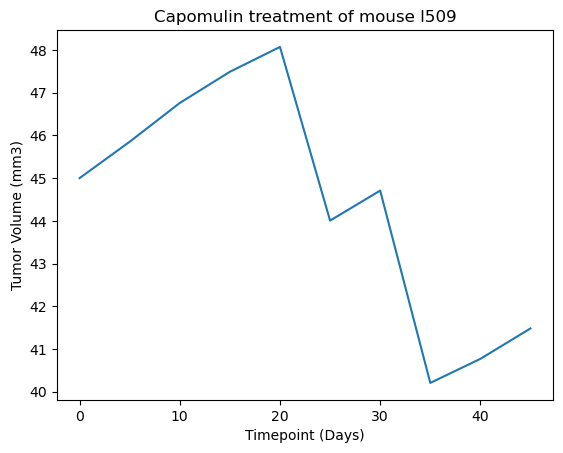

In [101]:
plt.plot(Captime,Cap) #plotting time and volume data 
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")
plt.title("Capomulin treatment of mouse l509")

In [102]:
ID = []#create lists fo ID weight and volume for scatter 
Weight = []
TumorVolume = []
for index,row in CleanCombined.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        ID.append(row["Mouse ID"])
        Weight.append(row["Weight (g)"])
        TumorVolume.append(row["Tumor Volume (mm3)"])
        
        

In [103]:
DF = pd.DataFrame(ID) #create dataframe to graphy 

In [104]:
DF['Weight'] = Weight #adding weight column 

In [105]:
DF["Volume"]= TumorVolume #adding volume column 

In [106]:
DF = DF.rename(columns = {0:"Mouse ID"}) #rename 

In [107]:
Capgroup = DF.groupby("Mouse ID") #group the weight and volumbe by each mouse 

In [108]:
AverageTumorVolume = list(Capgroup["Volume"].mean()) #make list 

In [109]:
Weight = list(Capgroup["Weight"].mean()) #weight for each mouse 

Text(0.5, 0, 'Weight')

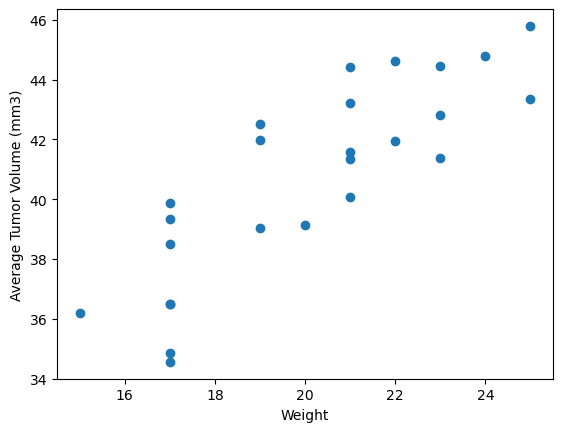

In [110]:
Scatter = plt.scatter(Weight,AverageTumorVolume) #plot data above 
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight")


In [111]:
from scipy.stats import linregress
x_values = Weight
y_values = AverageTumorVolume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #just get the slope and other values 

The r-squared value is 0.7088568047708721
The correction between more weight and average tumor volume is 0.84


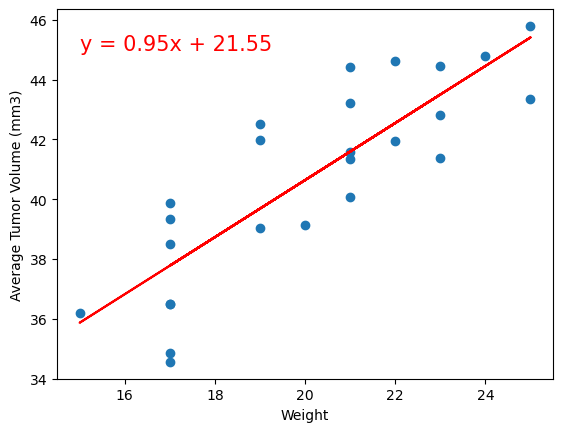

In [112]:
from scipy.stats import linregress #create scatter plot 
x_values = Capgroup["Weight"].mean() # X axis values 
y_values = AverageTumorVolume #y axis values 
Scatter = plt.scatter(Weight,AverageTumorVolume) #make scatter plot 
plt.ylabel("Average Tumor Volume (mm3)") #y label 
plt.xlabel("Weight") #x labe 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values) #find correlation and regression 
regress_values = x_values * slope + intercept #crate slope formula y = mx + b 
plt.plot(x_values,regress_values,"r-") # creat line 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #what does slope forumula look like? 
plt.annotate(line_eq,(15,45),fontsize=15,color="red") #show slope forumla 
print(f'The r-squared value is {rvalue ** 2}') #r squared meessage 
print(f'The correction between more weight and average tumor volume is {round(rvalue,2)}') #R message 
plt.show()

In [113]:
DF = CleanCombined.groupby("Mouse ID").max() #method 2 for pie value_counts() 

In [114]:
DF

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...
z435,Propriva,Female,12,26,10,48.710661,0
z578,Ramicane,Male,11,16,45,45.000000,0
z581,Infubinol,Female,24,25,45,62.754451,3


In [115]:
ValueCounts = DF['Sex'].value_counts() #using value cousnts vs for loop I used before 

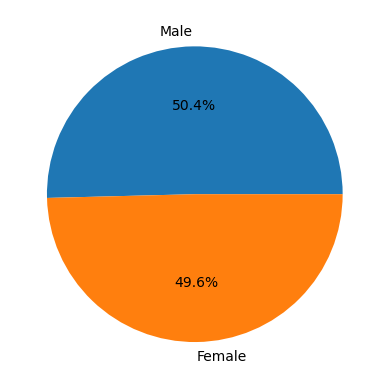

In [116]:
plt.pie(ValueCounts.values,labels = ValueCounts.index.values, autopct = "%1.1f%%")
plt.show()

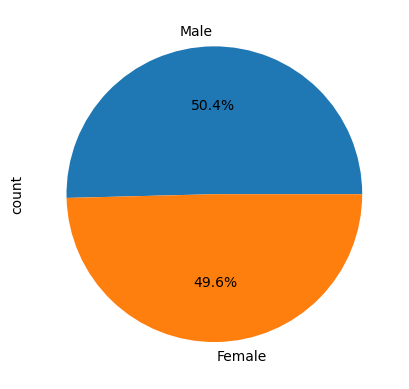

In [117]:
PieChart2 = ValueCounts.plot(kind = "pie", labels = ["Male", "Female"], autopct = "%1.1f%%", subplots = True)#pandas 